# 🗳️ Elecciones EEUU

🧑‍💻 Lucía Cordero | Jorge Garcelán

![Election Results](https://www.porunmundomasjusto.es/wp-content/uploads/2020/11/mundomasjusto.png)


<div class="warning" style='padding:0.1em; border-left: 4px solid #17a2b8; background-color:#e8f8ff;'>
<span>
<p style='margin-top:1em; margin-left:1em; text-align:left'>
<b>🎯Motivación y Objetivos</b></p>
<p style='margin-left:1em;'>
Este proyecto de análisis de datos está basado en los resultados de las <strong>elecciones presidenciales de Estados Unidos de 2020</strong>. Inspirados por nuestro interés en la política y teniendo en cuenta que las elecciones presidenciales de EE.UU. de 2024 son el 5 de noviembre, se nos ocurrió abordar este tema.
<br><br>
    El objetivo es aplicar técnicas de <strong>aprendizaje supervisado</strong> y <strong>no supervisado</strong> para explorar patrones y tendencias, así como predecir los resultados electorales en función de las características socioeconómicas y demográficas de cada condado. Este enfoque nos permite estudiar cómo estos factores influyen en los comportamientos de los votantes y cómo podrían anticiparse los resultados de futuras elecciones.
</p>
</span>
</div>

<div style="border-left: 4px solid #ffa500; background-color: #fff4e5; padding: 10px;">
    <strong>⚠️Warning:</strong> Es importante mencionar que no hemos podido utilizar los datos de 2024 como test pues no se encuentran disponibles todavía.
</div>


## Librerías

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


## Datasets

### Seleccionar año

In [232]:
CENSUS_YEAR = 2015 # 2015, 2019, 2023
ELECTORAL_YEAR = CENSUS_YEAR + 1

### Cargar datos

In [233]:
data = pd.read_csv(f'data/final_data_{ELECTORAL_YEAR}.csv')

## Regresión

<div style="border-left: 4px solid #17a2b8; background-color: #e8f8ff; padding: 10px;">
    <strong>🎯Objetivo:</strong> Predecir el porcentaje de votos a Biden en cada condado (y, por tanto, también el de Trump).
</div>


#### Dataset

In [234]:
# columns_to_drop = ["votes_gop", "votes_dem", "total_votes", "votes_others", "per_votes_others", "winner",
#                    'county_fips', "county", "state_code", "county_code"]  # Nombres de las columnas a eliminar

columns_to_drop = ["per_dem", "per_gop", "delta_per_oth",
                    "votes_gop", "votes_dem", "total_votes", "votes_others", "per_votes_others", "winner",
                    'county_fips', "county", "state_code", "county_code"]  # Nombres de las columnas a eliminar

data_reg = data.drop(columns=columns_to_drop)
data_reg

,state,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,...,poverty_rate,households_renter_rate,households_owner_rate,unemployment_rate,public_transport_rate,no_health_insurance_rate,delta_per_dem,delta_per_gop,latitude,longitude
0,Alabama,55221,37.7,51281.0,141300.0,2.68,20396,883.0,23675,48.43,...,12.78,26.08,73.92,7.64,0.04,9.97,-2.618911,0.802053,32.536153,-86.641196
1,Alabama,195121,42.2,50254.0,169300.0,2.60,74104,879.0,81184,48.85,...,13.22,28.48,71.52,7.50,0.06,12.81,-2.001264,-0.038277,30.725862,-87.723954
2,Alabama,26932,38.8,32964.0,92200.0,2.61,9222,579.0,8329,53.83,...,23.84,36.41,63.59,17.65,0.13,13.86,-4.592041,3.933864,31.867889,-85.389245
3,Alabama,22604,38.9,38678.0,102700.0,2.95,7027,651.0,8089,53.41,...,15.43,24.89,75.11,8.31,0.19,8.88,-4.796528,3.899783,32.996456,-87.124963
4,Alabama,57710,40.7,45813.0,119800.0,2.74,20816,601.0,21450,49.41,...,16.55,21.10,78.90,7.67,0.15,11.54,-3.877888,3.358964,33.985248,-86.569756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,Wyoming,44772,33.6,69022.0,190900.0,2.64,16679,892.0,22118,52.17,...,11.30,29.01,70.99,5.41,1.21,13.40,-9.090925,4.721905,41.660236,-108.879456
3103,Wyoming,22311,38.0,75325.0,689000.0,2.63,8187,1113.0,13082,51.71,...,7.34,39.50,60.50,2.61,4.87,16.81,5.367221,-10.584667,43.935079,-110.589127
3104,Wyoming,20930,34.6,56569.0,176700.0,2.76,7502,641.0,9551,50.82,...,13.59,26.95,73.05,4.40,1.29,13.93,-4.333320,-1.813854,41.287415,-110.547551
3105,Wyoming,8400,43.4,47652.0,160800.0,2.34,3512,605.0,3583,49.33,...,13.54,26.25,73.75,6.80,0.01,16.60,-5.981390,1.318888,43.904771,-107.681649


In [235]:
# from sklearn.preprocessing import StandardScaler

# # Definir las columnas a excluir del escalado
# cols_excluir = ['state', 'per_dem', 'per_gop'] 

# # Seleccionar solo las columnas que deben ser escaladas
# cols_escalar = [col for col in data_reg.columns if col not in cols_excluir]

# # Aplicar StandardScaler solo a las columnas seleccionadas
# scaler = StandardScaler()
# data_reg[cols_escalar] = scaler.fit_transform(data_reg[cols_escalar])

# # Mostrar los primeros registros
# data_reg.head()

#### Data Splitting

In [236]:
# X = data_reg.drop(columns=["per_dem", "per_gop"])  # Características (sin la columna objetivo)
X = data_reg.drop(columns=["delta_per_dem", "delta_per_gop"])  # Características (sin la columna objetivo)

In [237]:
# Crear las columnas dummy a partir de la columna 'state'
dummies = pd.get_dummies(X['state'], prefix='state', drop_first=False)

# Concatenar las columnas dummy al DataFrame original, conservando la columna 'state'
X = pd.concat([X, dummies], axis=1)

X.head()

,state,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Alabama,55221,37.7,51281.0,141300.0,2.68,20396,883.0,23675,48.43,...,False,False,False,False,False,False,False,False,False,False
1,Alabama,195121,42.2,50254.0,169300.0,2.60,74104,879.0,81184,48.85,...,False,False,False,False,False,False,False,False,False,False
2,Alabama,26932,38.8,32964.0,92200.0,2.61,9222,579.0,8329,53.83,...,False,False,False,False,False,False,False,False,False,False
3,Alabama,22604,38.9,38678.0,102700.0,2.95,7027,651.0,8089,53.41,...,False,False,False,False,False,False,False,False,False,False
4,Alabama,57710,40.7,45813.0,119800.0,2.74,20816,601.0,21450,49.41,...,False,False,False,False,False,False,False,False,False,False


In [238]:
# # y_dem = data_reg["per_dem"]  # Columna objetivo

# # # Dividir los datos en 80% para train y 20% para test
# # X_train, X_test, y_train_dem, y_test_dem = train_test_split(X, y_dem, test_size=0.2, random_state=42)

In [239]:
from sklearn.model_selection import train_test_split

# Columna objetivo dem
# y_dem = data_reg["per_dem"]
y_dem = data_reg["delta_per_dem"]  
#   

# Asegurar que cada estado tiene representación en train y test
train_idx, test_idx = [], []

for state in data_reg["state"].unique():
    state_data = data_reg[data_reg["state"] == state]
    
    if len(state_data) < 5:  # Si hay pocos condados, los dejamos todos en train
        train_idx.extend(state_data.index)
    else:
        train_set, test_set = train_test_split(state_data, test_size=0.2, random_state=42)
        train_idx.extend(train_set.index)
        test_idx.extend(test_set.index)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train_dem, y_test_dem = y_dem.loc[train_idx], y_dem.loc[test_idx]

# Ver distribución
print("X_train:\n", X_train["state"].value_counts())
print("X_test:\n", X_test["state"].value_counts())


X_train:
 state
Texas                   201
Georgia                 127
Virginia                106
Kentucky                 96
Missouri                 92
Kansas                   84
Illinois                 81
North Carolina           80
Iowa                     79
Tennessee                76
Nebraska                 74
Indiana                  73
Ohio                     70
Minnesota                69
Michigan                 66
Mississippi              65
Oklahoma                 61
Arkansas                 60
Wisconsin                57
Florida                  53
Alabama                  53
Pennsylvania             53
South Dakota             52
Louisiana                51
Colorado                 51
New York                 49
California               46
West Virginia            44
Montana                  44
North Dakota             42
South Carolina           36
Idaho                    35
Washington               31
Oregon                   28
New Mexico               26
Utah

In [240]:
# # y_gop = data_reg["per_gop"]  # Columna objetivo

# # # Dividir los datos en 80% para train y 20% para test
# # _, _, y_train_gop, y_test_gop = train_test_split(X, y_gop, test_size=0.2, random_state=42)

In [241]:
from sklearn.model_selection import train_test_split

# Columna objetivo gop
# y_gop = data_reg["per_gop"]  
y_gop = data_reg["delta_per_gop"]  

# Asegurar que cada estado tiene representación en train y test
train_idx, test_idx = [], []

for state in data_reg["state"].unique():
    state_data = data_reg[data_reg["state"] == state]
    
    if len(state_data) < 5:  # Si hay pocos condados, los dejamos todos en train
        train_idx.extend(state_data.index)
    else:
        train_set, test_set = train_test_split(state_data, test_size=0.2, random_state=42)
        train_idx.extend(train_set.index)
        test_idx.extend(test_set.index)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train_gop, y_test_gop = y_gop.loc[train_idx], y_gop.loc[test_idx]

# Ver distribución
print("X_train:\n", X_train["state"].value_counts())
print("X_test:\n", X_test["state"].value_counts())

X_train:
 state
Texas                   201
Georgia                 127
Virginia                106
Kentucky                 96
Missouri                 92
Kansas                   84
Illinois                 81
North Carolina           80
Iowa                     79
Tennessee                76
Nebraska                 74
Indiana                  73
Ohio                     70
Minnesota                69
Michigan                 66
Mississippi              65
Oklahoma                 61
Arkansas                 60
Wisconsin                57
Florida                  53
Alabama                  53
Pennsylvania             53
South Dakota             52
Louisiana                51
Colorado                 51
New York                 49
California               46
West Virginia            44
Montana                  44
North Dakota             42
South Carolina           36
Idaho                    35
Washington               31
Oregon                   28
New Mexico               26
Utah

In [242]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Supongamos que X_train es tu DataFrame de entrenamiento que incluye la columna "state"
# y que deseas balancear la representación de cada estado.

# 1. Codificar la columna "state"
le = LabelEncoder()
state_encoded = le.fit_transform(X_train['state'])

# 2. Crear un DataFrame con las características sin la columna "state"
X_train_features = X_train.drop('state', axis=1)
y_train_state = state_encoded

# 3. Identificar las clases con solo una muestra y duplicarlas
unique, counts = np.unique(y_train_state, return_counts=True)
X_train_features_aug = X_train_features.copy()
y_train_state_aug = np.array(y_train_state)

for label, count in zip(unique, counts):
    if count == 1:
        # Obtener el índice de la muestra única
        idx = np.where(y_train_state == label)[0]
        # Duplicar la muestra
        X_train_features_aug = pd.concat([X_train_features_aug, X_train_features.iloc[idx]], axis=0)
        y_train_state_aug = np.concatenate([y_train_state_aug, y_train_state[idx]])

# 4. Recalcular el mínimo número de muestras en las clases y ajustar k_neighbors
unique_aug, counts_aug = np.unique(y_train_state_aug, return_counts=True)
min_count = counts_aug.min()
k_neighbors = max(1, min_count - 1)

# 5. Aplicar SMOTE con el parámetro k_neighbors ajustado
smote = SMOTE(k_neighbors=k_neighbors, random_state=42)
X_train_res, state_res = smote.fit_resample(X_train_features_aug, y_train_state_aug)

# 6. Decodificar las etiquetas para volver a obtener los nombres de los estados
state_res_decoded = le.inverse_transform(state_res)
X_train_res['state'] = state_res_decoded

# Mostrar la distribución balanceada de estados
print("Distribución de estados tras SMOTE:")
print(X_train_res['state'].value_counts())


Distribución de estados tras SMOTE:
state
Alabama                 201
Pennsylvania            201
Nevada                  201
New Hampshire           201
New Jersey              201
New Mexico              201
New York                201
North Carolina          201
North Dakota            201
Ohio                    201
Oklahoma                201
Oregon                  201
Rhode Island            201
Arizona                 201
South Carolina          201
South Dakota            201
Tennessee               201
Texas                   201
Utah                    201
Vermont                 201
Virginia                201
Washington              201
West Virginia           201
Wisconsin               201
Nebraska                201
Montana                 201
Missouri                201
Mississippi             201
Arkansas                201
California              201
Colorado                201
Connecticut             201
Delaware                201
District of Columbia    201
Florid

/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [243]:
columns_to_drop = ["state"]  # Nombres de las columnas a eliminar
X_train = X_train.drop(columns=columns_to_drop)
X_train

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
62,200458,31.9,46565.0,156500.0,2.75,69128,785.0,84072,48.28,51.72,...,False,False,False,False,False,False,False,False,False,False
34,103534,39.0,41571.0,123300.0,2.62,39197,691.0,42644,47.87,52.13,...,False,False,False,False,False,False,False,False,False,False
48,414251,37.0,43809.0,122400.0,2.62,154188,788.0,162517,47.85,52.15,...,False,False,False,False,False,False,False,False,False,False
7,116648,39.1,41703.0,105900.0,2.52,45154,637.0,45108,48.24,51.76,...,False,False,False,False,False,False,False,False,False,False
41,88805,39.0,49570.0,142100.0,2.64,32213,616.0,36510,50.25,49.75,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,13544,42.9,42689.0,148700.0,2.35,5384,669.0,5588,53.01,46.99,...,False,False,False,False,False,False,False,False,False,True
3094,95431,36.7,60706.0,190000.0,2.51,37294,827.0,46192,50.20,49.80,...,False,False,False,False,False,False,False,False,False,True
3098,28985,43.6,56363.0,221300.0,2.38,11822,692.0,14159,49.09,50.91,...,False,False,False,False,False,False,False,False,False,True
3103,22311,38.0,75325.0,689000.0,2.63,8187,1113.0,13082,51.71,48.29,...,False,False,False,False,False,False,False,False,False,True


In [244]:
columns_to_drop = ["state"]  # Nombres de las columnas a eliminar
X_test = X_test.drop(columns=columns_to_drop)
X_test

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
36,659026,37.4,45610.0,143400.0,2.47,260929,810.0,281448,47.28,52.72,...,False,False,False,False,False,False,False,False,False,False
16,54444,42.2,40576.0,99400.0,2.43,22204,632.0,20593,48.31,51.69,...,False,False,False,False,False,False,False,False,False,False
4,57710,40.7,45813.0,119800.0,2.74,20816,601.0,21450,49.41,50.59,...,False,False,False,False,False,False,False,False,False,False
9,26008,45.4,36296.0,105100.0,2.28,11278,621.0,9631,49.89,50.11,...,False,False,False,False,False,False,False,False,False,False
45,20306,42.2,32042.0,90800.0,2.42,8281,530.0,6554,46.55,53.45,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,8750,47.9,38500.0,155500.0,2.30,3758,592.0,3682,51.37,48.63,...,False,False,False,False,False,False,False,False,False,True
3093,8600,44.6,54065.0,227700.0,2.34,3649,854.0,3849,52.62,47.38,...,False,False,False,False,False,False,False,False,False,True
3084,37565,26.6,42834.0,216100.0,2.26,15662,727.0,19027,52.42,47.58,...,False,False,False,False,False,False,False,False,False,True
3092,4809,49.6,45278.0,151600.0,2.15,2182,669.0,2077,49.78,50.22,...,False,False,False,False,False,False,False,False,False,True


#### Multicolinealidad

In [245]:
import numpy as np
import pandas as pd
from numpy.linalg import cond

# 🔹 Asegurar que X_train solo tenga variables numéricas
X_numeric = X_train.select_dtypes(include=[np.number]).astype(np.float64)

# 🔹 Calcular índice de condición
condition_index = cond(X_numeric)

# 🔹 Verificar si hay multicolinealidad fuerte
print(f"Índice de Condición de X: {condition_index}")

if condition_index > 30:
    print("⚠️ Alerta: Multicolinealidad fuerte detectada en X")


Índice de Condición de X: 5.655124759714157e+19
⚠️ Alerta: Multicolinealidad fuerte detectada en X


In [246]:
# import pandas as pd

# # Calcular la matriz de correlación
# corr_matrix = X_train.corr().abs()

# # Identificar pares de variables con correlación > 0.95
# high_corr_vars = set()
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if corr_matrix.iloc[i, j] > 0.95:
#             colname = X_train.columns[i]
#             high_corr_vars.add(colname)

# print(f"Variables altamente correlacionadas: {high_corr_vars}")

# # Eliminar variables correlacionadas
# X_train = X_train.drop(columns=high_corr_vars, errors='ignore')
# X_test = X_test.drop(columns=high_corr_vars, errors='ignore')

#### Benchmark Model

In [247]:
# Resumen estadístico
print(y_train_dem.describe())

count    2470.000000
mean       -6.818511
std         4.940312
min       -22.412237
25%       -10.193222
50%        -6.328139
75%        -3.361651
max         7.768846
Name: delta_per_dem, dtype: float64


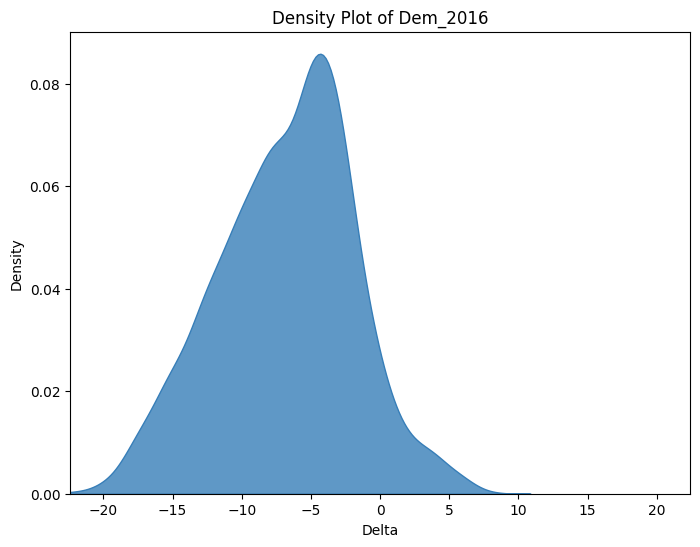

In [248]:
# Crear la gráfica de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train_dem, color="#377eb8", fill=True, alpha=0.8)

# Configurar el título y etiquetas
plt.title(f"Density Plot of Dem_{ELECTORAL_YEAR}")
# plt.xlabel(f"per_dem_{ELECTORAL_YEAR}")
plt.xlabel("Delta")
plt.ylabel("Density")
# plt.xlim(-0.1, 1)
plt.xlim(min(y_train_dem), abs(min(y_train_dem)))

# Mostrar la gráfica
plt.show()

In [249]:
average_dem = y_train_dem.mean()

# Usar f-strings para concatenar el mensaje y el valor promedio
print(f"Av. Dem: {average_dem}")

Av. Dem: -6.818511212505857


#### Importancia de las variables

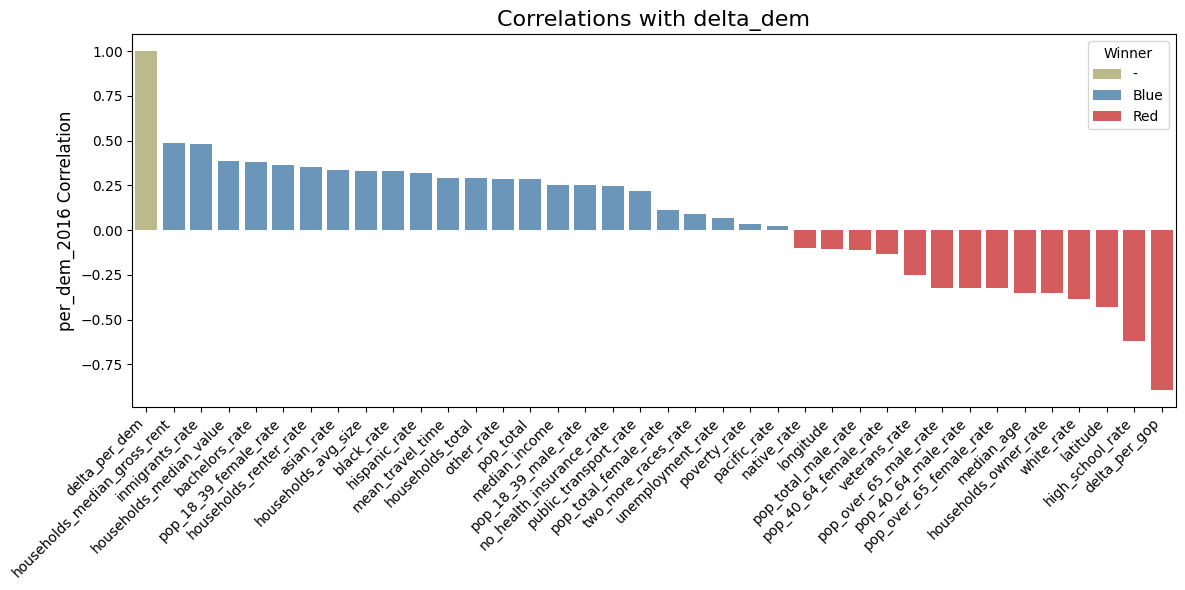

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Filtrar solo columnas numéricas
numeric_data = data_reg.select_dtypes(include=[np.number])

# Paso 2: Calcular las correlaciones
# corr_votes = numeric_data.corr()["per_dem"].sort_values(ascending=False)
corr_votes = numeric_data.corr()["delta_per_dem"].sort_values(ascending=False)


# Paso 3: Crear el DataFrame de correlaciones
corr_df = pd.DataFrame(corr_votes).reset_index()
corr_df.columns = ['Variable', 'Correlation']

# Clasificar como "Red", "Blue", o "-"
corr_df['Winner'] = np.where(corr_df['Correlation'] < 0, 'Red', 
                             np.where(corr_df['Correlation'] == 1, '-', 'Blue'))

# Paso 4: Visualizar con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=corr_df, x='Variable', y='Correlation', hue='Winner', dodge=False,
            palette={"Red": "#e41a1c", "Blue": "#377eb8", "-": "#b6b164"}, alpha=0.8)

# plt.title("Correlations with Dem % of Vote", fontsize=16)
plt.title("Correlations with delta_dem", fontsize=16)
plt.xlabel("")
plt.ylabel(f"per_dem_{ELECTORAL_YEAR} Correlation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.tight_layout()
plt.show()

🔹 Variables seleccionadas por AIC: ['high_school_rate', 'households_median_gross_rent', 'black_rate', 'latitude', 'longitude', 'bachelors_rate', 'pacific_rate', 'inmigrants_rate', 'veterans_rate', 'hispanic_rate', 'no_health_insurance_rate', 'native_rate', 'pop_40_64_male_rate', 'other_rate', 'households_avg_size', 'unemployment_rate', 'median_age', 'pop_total_female_rate', 'public_transport_rate', 'households_median_value', 'pop_over_65_female_rate', 'households_renter_rate', 'poverty_rate']
🏆 Top 50 mejores variables: ['high_school_rate', 'households_median_gross_rent', 'black_rate', 'latitude', 'longitude', 'bachelors_rate', 'pacific_rate', 'inmigrants_rate', 'veterans_rate', 'hispanic_rate', 'no_health_insurance_rate', 'native_rate', 'pop_40_64_male_rate', 'other_rate', 'households_avg_size', 'unemployment_rate', 'median_age', 'pop_total_female_rate', 'public_transport_rate', 'households_median_value', 'pop_over_65_female_rate', 'households_renter_rate', 'poverty_rate']


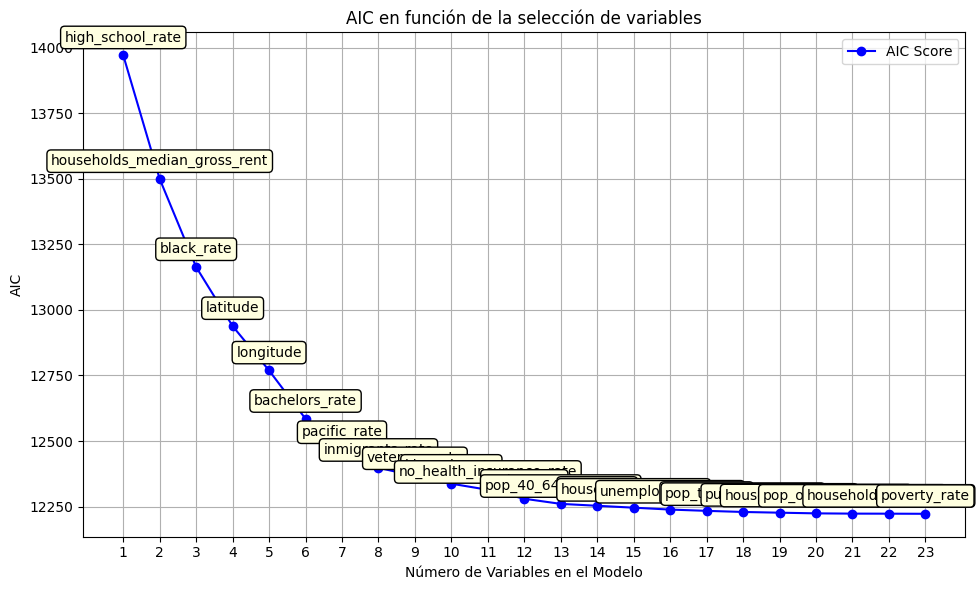

In [251]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

n = 50

# Asegurar que X_train tenga solo variables numéricas y eliminar NaN
X_train_fw = X_train.select_dtypes(include=[np.number]).dropna()
X_train_fw = sm.add_constant(X_train_fw)  # Añadir constante

# Función para la selección hacia adelante basada en AIC
def forward_selection(y, X):
    remaining_features = X.columns.tolist()
    selected_features = []
    best_aic = float('inf')
    aic_history = []

    while remaining_features:
        aic_candidates = []

        for feature in remaining_features:
            model = sm.OLS(y, X[selected_features + [feature]]).fit()
            aic_candidates.append((model.aic, feature))

        # Ordenar por menor AIC y seleccionar la mejor variable
        aic_candidates.sort()
        current_aic, best_feature = aic_candidates[0]

        # Detener si no hay mejora significativa en AIC
        if current_aic < best_aic - 0.01:  # Se usa 0.01 para evitar selección de variables irrelevantes
            best_aic = current_aic
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            aic_history.append(best_aic)
        else:
            break  # Si AIC no mejora, detener

    return selected_features, aic_history

# Ejecutar la selección hacia adelante
selected_features, aic_history = forward_selection(y_train_dem, X_train_fw)

# Seleccionar las 10 mejores variables según el orden en AIC
top_n_features = selected_features[:n]

# Mostrar los resultados
print("🔹 Variables seleccionadas por AIC:", selected_features)
print(f"🏆 Top {n} mejores variables:", top_n_features)

# 📊 **Visualizar la evolución del AIC**
plt.figure(figsize=(10, 6))
plt.plot(aic_history, marker='o', linestyle='-', color='b', label="AIC Score")
plt.title('AIC en función de la selección de variables')
plt.xlabel('Número de Variables en el Modelo')
plt.ylabel('AIC')
plt.xticks(range(len(aic_history)), range(1, len(aic_history) + 1))  # Etiquetas de número de variables
plt.grid()

# Añadir etiquetas con el nombre de las variables seleccionadas
for i, feature in enumerate(selected_features):
    plt.annotate(feature, 
                 (i, aic_history[i]),  
                 textcoords="offset points", 
                 xytext=(0, 10),  
                 ha='center',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightyellow'))

plt.legend()
plt.tight_layout()
plt.show()


In [252]:
# # 🔹 Verificar y agregar 'longitude' y 'latitude' solo si no están en la lista
# if "longitude" not in top_n_features:
#     top_n_features.append("longitude")

# if "latitude" not in top_n_features:
#     top_n_features.append("latitude")

# # 🔹 Filtrar X_train y X_test con las variables seleccionadas
# X_train = X_train[top_n_features]
# X_test = X_test[top_n_features]


In [253]:
X_test

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
36,659026,37.4,45610.0,143400.0,2.47,260929,810.0,281448,47.28,52.72,...,False,False,False,False,False,False,False,False,False,False
16,54444,42.2,40576.0,99400.0,2.43,22204,632.0,20593,48.31,51.69,...,False,False,False,False,False,False,False,False,False,False
4,57710,40.7,45813.0,119800.0,2.74,20816,601.0,21450,49.41,50.59,...,False,False,False,False,False,False,False,False,False,False
9,26008,45.4,36296.0,105100.0,2.28,11278,621.0,9631,49.89,50.11,...,False,False,False,False,False,False,False,False,False,False
45,20306,42.2,32042.0,90800.0,2.42,8281,530.0,6554,46.55,53.45,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,8750,47.9,38500.0,155500.0,2.30,3758,592.0,3682,51.37,48.63,...,False,False,False,False,False,False,False,False,False,True
3093,8600,44.6,54065.0,227700.0,2.34,3649,854.0,3849,52.62,47.38,...,False,False,False,False,False,False,False,False,False,True
3084,37565,26.6,42834.0,216100.0,2.26,15662,727.0,19027,52.42,47.58,...,False,False,False,False,False,False,False,False,False,True
3092,4809,49.6,45278.0,151600.0,2.15,2182,669.0,2077,49.78,50.22,...,False,False,False,False,False,False,False,False,False,True


In [254]:
X_train

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
62,200458,31.9,46565.0,156500.0,2.75,69128,785.0,84072,48.28,51.72,...,False,False,False,False,False,False,False,False,False,False
34,103534,39.0,41571.0,123300.0,2.62,39197,691.0,42644,47.87,52.13,...,False,False,False,False,False,False,False,False,False,False
48,414251,37.0,43809.0,122400.0,2.62,154188,788.0,162517,47.85,52.15,...,False,False,False,False,False,False,False,False,False,False
7,116648,39.1,41703.0,105900.0,2.52,45154,637.0,45108,48.24,51.76,...,False,False,False,False,False,False,False,False,False,False
41,88805,39.0,49570.0,142100.0,2.64,32213,616.0,36510,50.25,49.75,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,13544,42.9,42689.0,148700.0,2.35,5384,669.0,5588,53.01,46.99,...,False,False,False,False,False,False,False,False,False,True
3094,95431,36.7,60706.0,190000.0,2.51,37294,827.0,46192,50.20,49.80,...,False,False,False,False,False,False,False,False,False,True
3098,28985,43.6,56363.0,221300.0,2.38,11822,692.0,14159,49.09,50.91,...,False,False,False,False,False,False,False,False,False,True
3103,22311,38.0,75325.0,689000.0,2.63,8187,1113.0,13082,51.71,48.29,...,False,False,False,False,False,False,False,False,False,True


#### Linear Regression

- Dem

In [255]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Probar diferentes versiones de regresión para mejorar el modelo
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha=1.0),  # Regularización L2
    "lasso": Lasso(alpha=0.1)   # Regularización L1
}

best_model = None
best_r2 = float('-inf')
results = {}

for name, model in models.items():
    model.fit(X_train, y_train_dem)
    
    # Evaluación con validación cruzada
    mse_scores = -cross_val_score(model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train, y_train_dem, scoring='r2', cv=cv)
    
    # Promedio y desviación estándar de las métricas
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()

    # Evaluación en el conjunto de test
    y_pred_dem = model.predict(X_test)
    mse_test = mean_squared_error(y_test_dem, y_pred_dem)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test_dem, y_pred_dem)
    r2_test = r2_score(y_test_dem, y_pred_dem)

    results[name] = {
        "Mean R² (CV)": mean_r2,
        "Std R² (CV)": std_r2,
        "Mean MSE (CV)": mean_mse,
        "Std MSE (CV)": std_mse,
        "Test R²": r2_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }
    
    # Guardar el mejor modelo basado en R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model = model
        best_name = name

# Guardar el mejor modelo encontrado
joblib.dump(best_model, f'models/{best_name.lower()}_delta_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar resultados
print(f'Best Model: {best_name}')
for model, metrics in results.items():
    print(f'\nModel: {model}')
    for metric, value in metrics.items():
        print(f'  {metric}: {value:.4f}')


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+04, tolerance: 6.026e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.560e+03, tolerance: 4.839e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

Best Model: ridge

Model: linear_regression
  Mean R² (CV): 0.7534
  Std R² (CV): 0.0192
  Mean MSE (CV): 5.9930
  Std MSE (CV): 0.4005
  Test R²: 0.7195
  Test MSE: 7.0346
  Test RMSE: 2.6523
  Test MAE: 1.9953

Model: ridge
  Mean R² (CV): 0.7535
  Std R² (CV): 0.0191
  Mean MSE (CV): 5.9900
  Std MSE (CV): 0.4033
  Test R²: 0.7218
  Test MSE: 6.9759
  Test RMSE: 2.6412
  Test MAE: 1.9798

Model: lasso
  Mean R² (CV): 0.6574
  Std R² (CV): 0.0259
  Mean MSE (CV): 8.3330
  Std MSE (CV): 0.6273
  Test R²: 0.6287
  Test MSE: 9.3120
  Test RMSE: 3.0516
  Test MAE: 2.3156


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.690e+03, tolerance: 4.784e+00
  model = cd_fast.enet_coordinate_descent(


- GOP

In [256]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Probar diferentes versiones de regresión para mejorar el modelo
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha=1.0),  # Regularización L2
    "lasso": Lasso(alpha=0.1)   # Regularización L1
}

best_model = None
best_r2 = float('-inf')
results = {}

for name, model in models.items():
    model.fit(X_train, y_train_gop)
    
    # Evaluación con validación cruzada
    mse_scores = -cross_val_score(model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train, y_train_gop, scoring='r2', cv=cv)
    
    # Promedio y desviación estándar de las métricas
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()

    # Evaluación en el conjunto de test
    y_pred_gop = model.predict(X_test)
    mse_test = mean_squared_error(y_test_gop, y_pred_gop)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test_gop, y_pred_gop)
    r2_test = r2_score(y_test_gop, y_pred_gop)

    results[name] = {
        "Mean R² (CV)": mean_r2,
        "Std R² (CV)": std_r2,
        "Mean MSE (CV)": mean_mse,
        "Std MSE (CV)": std_mse,
        "Test R²": r2_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }
    
    # Guardar el mejor modelo basado en R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model = model
        best_name = name

# Guardar el mejor modelo encontrado
joblib.dump(best_model, f'models/{best_name.lower()}_delta_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar resultados
print(f'Best Model: {best_name}')
for model, metrics in results.items():
    print(f'\nModel: {model}')
    for metric, value in metrics.items():
        print(f'  {metric}: {value:.4f}')


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+04, tolerance: 7.797e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+04, tolerance: 6.025e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

Best Model: linear_regression

Model: linear_regression
  Mean R² (CV): 0.7565
  Std R² (CV): 0.0278
  Mean MSE (CV): 7.5991
  Std MSE (CV): 0.9556
  Test R²: 0.7462
  Test MSE: 7.2833
  Test RMSE: 2.6988
  Test MAE: 2.0513

Model: ridge
  Mean R² (CV): 0.7564
  Std R² (CV): 0.0266
  Mean MSE (CV): 7.6090
  Std MSE (CV): 0.9865
  Test R²: 0.7490
  Test MSE: 7.2037
  Test RMSE: 2.6840
  Test MAE: 2.0368

Model: lasso
  Mean R² (CV): 0.6378
  Std R² (CV): 0.0309
  Mean MSE (CV): 11.4778
  Std MSE (CV): 2.4104
  Test R²: 0.6437
  Test MSE: 10.2236
  Test RMSE: 3.1974
  Test MAE: 2.3869


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+04, tolerance: 6.130e+00
  model = cd_fast.enet_coordinate_descent(


#### Random Forest

- Dem

In [257]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],            # Más árboles para mayor robustez
    "max_depth": [None, 10, 20, 30, 40, 50],                # Profundidades variadas para controlar el overfitting
    "min_samples_split": [2, 5, 10],                        # Número mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4, 6],                       # Muestras mínimas en una hoja, para suavizar el modelo
    "max_features": ['sqrt', 'log2'],               # Diferentes estrategias para seleccionar variables al azar
    "bootstrap": [True, False]                             # Evaluar si se usan muestras bootstrap o no
}

# Inicializar modelo base
base_model = RandomForestRegressor(random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_dem)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_dem = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_dem, y_pred_dem)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_dem, y_pred_dem)
r2 = r2_score(y_test_dem, y_pred_dem)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_dem, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/random_forest_delta_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Mean R² from Cross-Validation: 0.7435 ± 0.0186
Mean MSE: 6.2404 ± 0.4666
Test Set Metrics:
  R²: 0.7122
  MSE: 7.2169
  RMSE: 2.6864
  MAE: 2.0115


- GOP

In [258]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],            # Más árboles para mayor robustez
    "max_depth": [None, 10, 20, 30, 40, 50],                # Profundidades variadas para controlar el overfitting
    "min_samples_split": [2, 5, 10],                        # Número mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4, 6],                       # Muestras mínimas en una hoja, para suavizar el modelo
    "max_features": ['sqrt', 'log2'],               # Diferentes estrategias para seleccionar variables al azar
    "bootstrap": [True, False]                             # Evaluar si se usan muestras bootstrap o no
}

# Inicializar modelo base
base_model = RandomForestRegressor(random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_gop)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_gop = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_gop, y_pred_gop)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_gop, y_pred_gop)
r2 = r2_score(y_test_gop, y_pred_gop)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_gop, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/random_forest_delta_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Mean R² from Cross-Validation: 0.7540 ± 0.0229
Mean MSE: 7.7458 ± 1.3528
Test Set Metrics:
  R²: 0.7441
  MSE: 7.3442
  RMSE: 2.7100
  MAE: 1.9602


#### KNN

- Dem

In [259]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np


# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Inicializar el modelo K-Nearest Neighbors
base_model = KNeighborsRegressor()

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train_dem)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros encontrados
y_pred_dem = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_dem, y_pred_dem)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_dem, y_pred_dem)
r2 = r2_score(y_test_dem, y_pred_dem)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_dem, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/knn_delta_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Mean R² from Cross-Validation: 0.2884 ± 0.0408
Mean MSE: 17.3056 ± 0.9020
Test Set Metrics:
  R²: 0.2490
  MSE: 18.8325
  RMSE: 4.3396
  MAE: 3.4613


- GOP

In [260]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np


# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Inicializar el modelo K-Nearest Neighbors
base_model = KNeighborsRegressor()

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train_gop)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros encontrados
y_pred_gop = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_gop, y_pred_gop)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_gop, y_pred_gop)
r2 = r2_score(y_test_gop, y_pred_gop)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_gop, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/knn_delta_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Mean R² from Cross-Validation: 0.3085 ± 0.0407
Mean MSE: 21.8095 ± 3.5882
Test Set Metrics:
  R²: 0.3076
  MSE: 19.8679
  RMSE: 4.4573
  MAE: 3.3604


#### XGBoost

- Dem

In [261]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np
import xgboost as xgb

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar en XGBoost
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],  # Más árboles para mayor robustez
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # Velocidad de aprendizaje
    "max_depth": [3, 5, 7, 10],                # Profundidades variadas para controlar el overfitting
    "min_child_weight": [1, 3, 5],             # Controla la complejidad del modelo
    "subsample": [0.6, 0.8, 1.0],              # Muestras aleatorias para entrenar cada árbol
    "colsample_bytree": [0.6, 0.8, 1.0],       # Fracción de características a considerar por árbol
    "gamma": [0, 0.1, 0.2, 0.5],               # Penalización en hojas puras (reduce overfitting)
    "reg_alpha": [0, 0.01, 0.1, 1],            # Regularización L1 (Lasso)
    "reg_lambda": [0.01, 0.1, 1],              # Regularización L2 (Ridge)
}

# Inicializar modelo base de XGBoost
base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_dem)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_dem = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_dem, y_pred_dem)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_dem, y_pred_dem)
r2 = r2_score(y_test_dem, y_pred_dem)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_dem, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/xgboost_delta_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}
Mean R² from Cross-Validation: 0.8035 ± 0.0170
Mean MSE: 4.7771 ± 0.3932
Test Set Metrics:
  R²: 0.7901
  MSE: 5.2633
  RMSE: 2.2942
  MAE: 1.6907


- GOP

In [262]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np
import xgboost as xgb

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar en XGBoost
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],  # Más árboles para mayor robustez
    "learning_rate": [0.01, 0.05, 0.1, 0.2],   # Velocidad de aprendizaje
    "max_depth": [3, 5, 7, 10],                # Profundidades variadas para controlar el overfitting
    "min_child_weight": [1, 3, 5],             # Controla la complejidad del modelo
    "subsample": [0.6, 0.8, 1.0],              # Muestras aleatorias para entrenar cada árbol
    "colsample_bytree": [0.6, 0.8, 1.0],       # Fracción de características a considerar por árbol
    "gamma": [0, 0.1, 0.2, 0.5],               # Penalización en hojas puras (reduce overfitting)
    "reg_alpha": [0, 0.01, 0.1, 1],            # Regularización L1 (Lasso)
    "reg_lambda": [0.01, 0.1, 1],              # Regularización L2 (Ridge)
}

# Inicializar modelo base de XGBoost
base_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_gop)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_gop = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_gop, y_pred_gop)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_gop, y_pred_gop)
r2 = r2_score(y_test_gop, y_pred_gop)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_gop, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/xgboost_delta_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}
Mean R² from Cross-Validation: 0.8184 ± 0.0201
Mean MSE: 5.6674 ± 0.6827
Test Set Metrics:
  R²: 0.7972
  MSE: 5.8183
  RMSE: 2.4121
  MAE: 1.7751
